# Optimization Problem: Limiting Wavelengths to Single-Point Bins + Code for changing imposed cloud

In [1]:
import GraphsKey
import numpy as np
import FilterGrids
import Reflected_Spectra_grid as Reflected_Spectra
import PICASO_Climate_grid
import Photochem_grid
import OptimizeReflectedLightSpectrum as Optimize
import matplotlib.pyplot as plt
import h5py

import picaso.justdoit as jdi
import picaso.justplotit as jpi
import copy
import pandas as pd

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt

import pickle

## Load Archean Reflected Spectrum

In [2]:
## Archean Earth
df_mol_archean_earth = {
        "N2":0.945,
        "CO2":0.05,
        "CO":0.0005,
        "CH4":0.005, 
        "H2O":0.003
    }

res_archean_earth = Reflected_Spectra.make_case_earth(df_mol_earth=df_mol_archean_earth)

    pressure  temperature     N2   CO2      CO    CH4    H2O
0   0.000001   274.163889  0.945  0.05  0.0005  0.005  0.003
1   0.000001   274.163889  0.945  0.05  0.0005  0.005  0.003
2   0.000001   274.163889  0.945  0.05  0.0005  0.005  0.003
3   0.000002   274.163889  0.945  0.05  0.0005  0.005  0.003
4   0.000002   274.163889  0.945  0.05  0.0005  0.005  0.003
..       ...          ...    ...   ...     ...    ...    ...
85  0.537449   262.910544  0.945  0.05  0.0005  0.005  0.003
86  0.627701   270.360248  0.945  0.05  0.0005  0.005  0.003
87  0.733109   278.021043  0.945  0.05  0.0005  0.005  0.003
88  0.856218   285.898910  0.945  0.05  0.0005  0.005  0.003
89  1.000000   294.000000  0.945  0.05  0.0005  0.005  0.003

[90 rows x 7 columns]


In [3]:
wv_archean = res_archean_earth['all'][0]
fpfs_archean = res_archean_earth['all'][1]
alb_archean = res_archean_earth['all'][2]

## Load fpfs dictionary of fpfs differences for comparing archean to the mini-Neptune grid
- Also found the minimized mini-Neptune spectra here

In [4]:
total_flux_list = np.linspace(0.36, 1.1, 5)

fpfs_dict_archean_HZflux = Optimize.calc_objective_dict(wv_earth=wv_archean, fpfs_earth=fpfs_archean, resolution=5, 
                                                        total_flux_list=total_flux_list)
minNep_inputs_archean_HZflux, fpfs_values_min_archean_HZflux, index_min_archean_HZflux = Optimize.vec_norm_fpfs_minimized(fpfs_dict=fpfs_dict_archean_HZflux)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A matc

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
 This is the length right before plotting mini Neptunes: (1, 1)


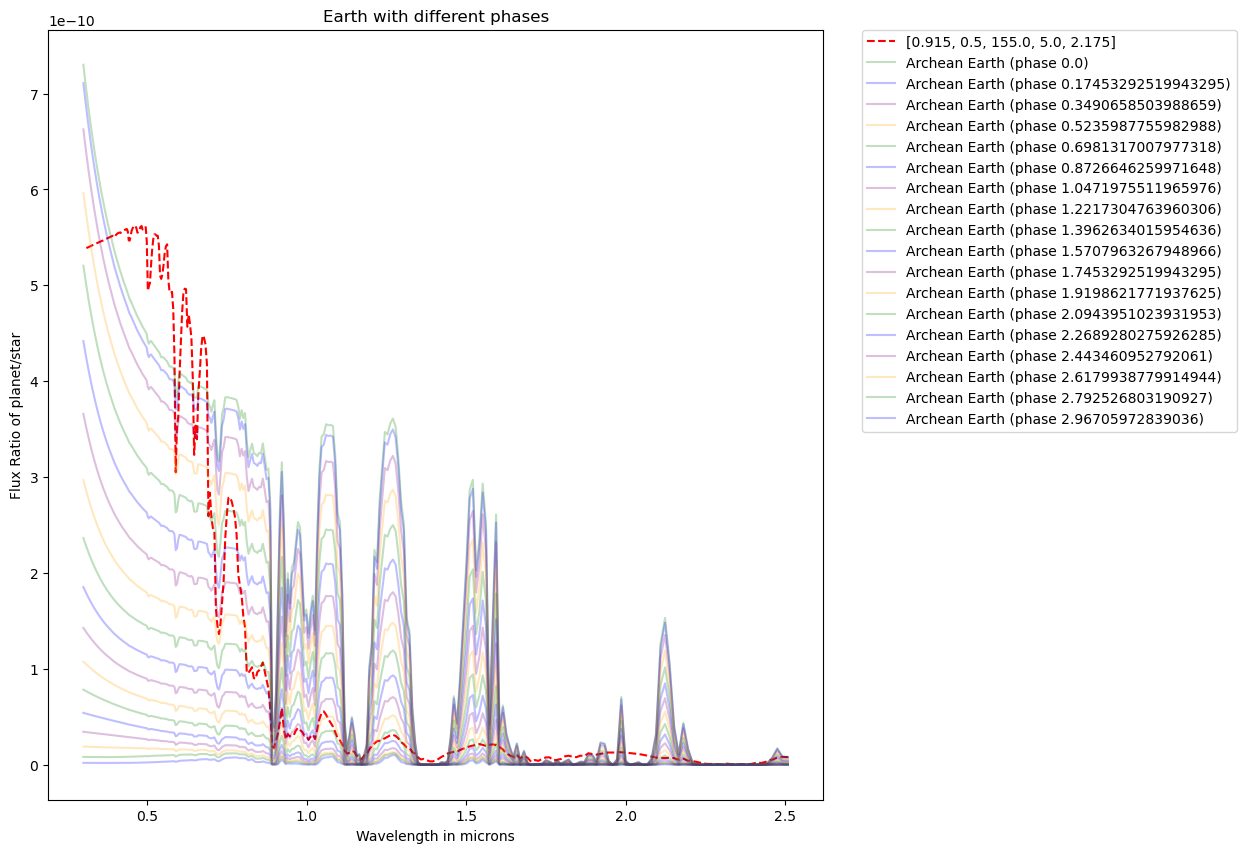

In [5]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_angle = phase_angle_list[:-1]

Optimize.graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=phase_angle, wv_earth_minNep=wv_archean,
                                    minNep_inputs_float=[minNep_inputs_archean_HZflux], limit_input=None, type_earth='Archean')

[0.915, 0.5, 155.0, 5.0, 2.175]
1.0 0.5 160 5 2.0943951023931953
3456 3456
Cases with clouds totaled: 3456
The nearest input in the grid found, [1.0, 0.5, 160, 5, 2.0943951023931953], did not have clouds.
False
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given

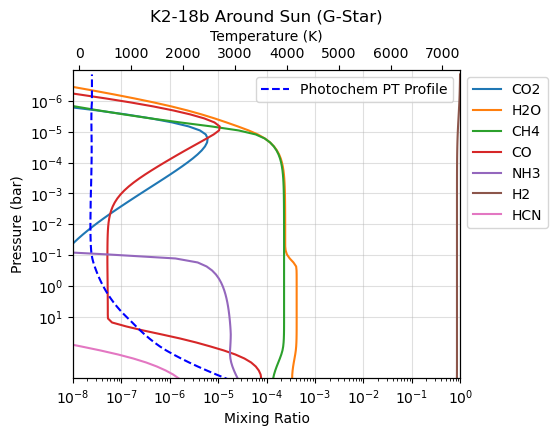

In [6]:
Optimize.plot_photochem_model_with_cloud(minNep_inputs=[minNep_inputs_archean_HZflux])

## Finds the closest cases and whether or not they had clouds if interpolating

In [7]:
def find_closest(sorted_list, x):

    # Find the index where x would be inserted in sorted_list
    insertion_point = np.searchsorted(np.array(sorted_list), x, side='left')
    
    # If x is smaller than all elements, the first element is the closest
    if insertion_point == 0:
        return sorted_list[0], sorted_list[0], sorted_list[0]
    
    # If x is larger than all elements, the last element is the closest
    if insertion_point == len(sorted_list):
        left_val = None
        right_val = None
        return sorted_list[-1], sorted_list[-1], sorted_list[-1],
    
    # Otherwise, compare the element to the left and right of the insertion point
    left_val = sorted_list[insertion_point - 1]
    right_val = sorted_list[insertion_point]
    
    if x - left_val <= right_val - x:
        closest_val = left_val
    else:
        closest_val = right_val

    return closest_val, left_val, right_val


def check_for_cloud(minNep_inputs):

    # Set full grid of Reflected Spectra results
    filename='results/ReflectedSpectra_fv.h5'
    gridvals=Reflected_Spectra.get_gridvals_RSM()
    
    gridvals_metal = [float(s) for s in gridvals[1]]
    gridvals_dict = {'total_flux':gridvals[0], 'planet_metallicity':np.array(gridvals_metal), 'tint':gridvals[2], 'kzz':gridvals[3], 'phase':gridvals[4]}
    index_flux = np.linspace(0, len(gridvals_dict['total_flux']) - 1, len(gridvals_dict['total_flux']), dtype=int)
    index_metal = np.linspace(0, len(gridvals_dict['planet_metallicity']) - 1, len(gridvals_dict['planet_metallicity']), dtype=int)
    index_tint = np.linspace(0, len(gridvals_dict['tint']) - 1, len(gridvals_dict['tint']), dtype=int)
    index_kzz = np.linspace(0, len(gridvals_dict['kzz']) - 1, len(gridvals_dict['kzz']), dtype=int)
    index_phase = np.linspace(0, len(gridvals_dict['phase']) - 1, len(gridvals_dict['phase']), dtype=int)
    true_converg_list = np.array([1])

    # Find the closest inputs to the values inputed by the user
    for input_value in minNep_inputs:
        print(input_value)
    
        user_flux = input_value[0]
        user_metal = input_value[1]
        user_tint = input_value[2]
        user_kzz = input_value[3]
        user_phase = input_value[4]

        # Check for closest index values
        closest_flux, left_val_flux, right_val_flux = find_closest(gridvals_dict['total_flux'], user_flux)
        print(left_val_flux)
        print(gridvals_dict['planet_metallicity'])
        closest_metal, left_val_metal, right_val_metal = find_closest(gridvals_dict['planet_metallicity'], user_metal)
        closest_tint, left_val_tint, right_val_tint = find_closest(gridvals_dict['tint'], user_tint)
        closest_kzz, left_val_kzz, right_val_kzz = find_closest(gridvals_dict['kzz'], user_kzz)
        closest_phase, left_val_phase, right_val_phase = find_closest(gridvals_dict['phase'], user_phase)

        input_list = [closest_flux, closest_metal, closest_tint, closest_kzz, closest_phase]
        left_val_list = [left_val_flux, left_val_metal, left_val_tint, left_val_kzz, left_val_phase]
        right_val_list = [right_val_flux, right_val_metal, right_val_tint, right_val_kzz, right_val_phase]

        print(closest_flux, closest_metal, closest_tint, closest_kzz, closest_phase)
    
        matching_indicies_clouds = []
        matching_values_clouds = []
        
        with h5py.File(filename, 'r') as f:
            
            for flux in index_flux:
                for metal in index_metal:
                    for tint in index_tint:
                        for kzz in index_kzz:
                            for phase in index_phase:
                                if np.array(list(f['results']['clouds'][flux][metal][tint][kzz][phase]))[0] == true_converg_list:
                                    index = np.array([flux, metal, tint, kzz, phase])
                                    matching_indicies_clouds.append(index)

            for array in matching_indicies_clouds:
                
                flux_index = array[0]
                metal_index = array[1]
                tint_index = array[2]
                kzz_index = array[3]
                phase_index = array[4]
                
                flux_value = gridvals_dict['total_flux'][flux_index]
                metal_value = gridvals_dict['planet_metallicity'][metal_index]
                tint_value = gridvals_dict['tint'][tint_index]
                kzz_value = gridvals_dict['kzz'][kzz_index]
                phase_value = gridvals_dict['phase'][phase_index]
                list_value = [flux_value, metal_value, tint_value, kzz_value, phase_value]
                matching_values_clouds.append(list_value)
                
        
            print(len(matching_indicies_clouds), len(matching_values_clouds))
        
            print(f'Cases with clouds totaled: {len(matching_values_clouds)}')

        if left_val_list in matching_values_clouds and right_val_list in matching_values_clouds:
            print(f'The leftmost and right nearest input in the grid found, did have clouds.')
            return True
        elif left_val_list in matching_values_clouds:
            print(f'The leftmost input in grid found did have clouds.')
            return True
        elif right_val_list in matching_values_clouds:
            print(f'The rightmost input in grid found did have clouds.')
            return True
        else:
            print(f'Neither rightmost or leftmost case had clouds.')
            return False

In [8]:
cloud_value = check_for_cloud(minNep_inputs=[minNep_inputs_archean_HZflux])

[0.915, 0.5, 155.0, 5.0, 2.175]
0.5
[0.5 1.  1.5 2. ]
1.0 0.5 160 5 2.0943951023931953
3456 3456
Cases with clouds totaled: 3456
The leftmost input in grid found did have clouds.


In [9]:
cloud_value

True

## Then calculates the photochemical graph w/ imposed cloud based on optimized case

In [10]:
def calc_sol_dict(minNep_inputs):
    
    for input_value in minNep_inputs:
        
        flux_index = input_value[0]
        metal_index = input_value[1]
        tint_index = input_value[2]
        kzz_index = input_value[3]
        phase_index = input_value[4]
    
        PT_list, sol_dict, soleq_dict, wno, albedo, fpfs, PT_list_Photochem = GraphsKey.find_all_plotting_values(total_flux=flux_index, planet_metal=metal_index, tint=tint_index, kzz=kzz_index, phase=phase_index, calc_PT=True, calc_PhotCh=True, calc_RSM=True)

        new_sol_dict = {}
        new_solaeq_dict = {}
        
        for key in sol_dict.keys():
            
            if key.endswith('_sol'):
                sol_dict[key] = list(sol_dict[key])
            if key == 'pressure_sol':
                sol_dict[key] = list(sol_dict[key])
            if key == 'temperature_sol':
                sol_dict[key] = list(sol_dict[key])

        sol_dict = {key.replace('_sol', '') if key.endswith('_sol') else key: value
        for key, value in sol_dict.items()}

        for key in sol_dict.keys():
            if key.endswith('aer'):
                new_solaeq_dict[key] = list(sol_dict[key])
            if key == 'pressure':
                new_solaeq_dict[key] = list(sol_dict[key])
            if key == 'temperature':
                new_solaeq_dict[key] = list(sol_dict[key])
            else:
                continue

        for key in sol_dict.keys():
            if key.endswith('aer'):
                continue
            else:
                new_sol_dict[key] = list(sol_dict[key])

    return new_sol_dict, new_solaeq_dict, PT_list_Photochem


def plot_photochem_model_with_cloud(minNep_inputs):

    cloud_check = check_for_cloud(minNep_inputs = minNep_inputs)
    print(cloud_check)
    sol_dict, solaer_dict, PT_list_Photochem = calc_sol_dict(minNep_inputs)

    if cloud_check is True:

        pbot = 1e-1 * 1e+6

        print(f'This is the vlaue of pbot: {pbot}')

        sol = sol_dict.copy()
        for key in solaer_dict.keys():
            if key.endswith('aer'):
                sol[key] = list(solaer_dict[key])

        print(sol.keys())
        
        # Plot the Composition from Photochem
        fig, ax1 = plt.subplots(1,1,figsize=[5,4])
        species = ['CO2','H2O','CH4','CO','NH3','H2','HCN', 'H2Oaer']

        print(list(sol['H2Oaer']))
         
        for i,sp in enumerate(species):
            ax1.plot(sol[sp],np.array(sol['pressure'])/1e6, c='C'+str(i), label=sp)
        
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.set_xlim(1e-8,1)
        ax1.set_ylim(1000,1e-7)
        ax1.grid(alpha=0.4)
        ax1.set_xlabel('Mixing Ratio')
        ax1.set_ylabel('Pressure (bar)')
        ax1.set_yticks(10.0**np.arange(-6,2))
        
        
        # Thickness of the box cloud
        ptop_earth = 0.6
        pbot_earth = 0.7
        logdp = np.log10(pbot_earth) - np.log10(ptop_earth)
        
        # Outline of the box cloud
        x_values = np.logspace(-8, 0, 10)
        y_values_bot = [pbot/10**6] * len(x_values)
        y_values_top = [(pbot/10**6) - ((10**(np.log10(pbot/10**6) - logdp)))] * len(x_values)
        
        ax1.plot(x_values, y_values_bot, c='black', ls='--', label='Cloud Bottom')
        ax1.plot(x_values, y_values_top, c='black', ls='--', label='Cloud Top')
        ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
         
        ax2 = ax1.twiny()
        ax2.set_xlabel('Temperature (K)')
        ax2.plot(PT_list_Photochem[1], (PT_list_Photochem[0]/(1e6)), c='blue', ls='--',label='Photochem PT Profile')
            
        plt.title('K2-18b Around Sun (G-Star)')
            
        plt.legend()
        
        plt.show()

    else:
        print(f"There were no clouds for this case!")

        sol = sol_dict.copy()
        
        # Plot the Composition from Photochem
        fig, ax1 = plt.subplots(1,1,figsize=[5,4])
        species = ['CO2','H2O','CH4','CO','NH3','H2','HCN']
         
        for i,sp in enumerate(species):
            ax1.plot(sol[sp],np.array(sol['pressure'])/1e6, c='C'+str(i), label=sp)
          
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.set_xlim(1e-8,1)
        ax1.set_ylim(1000,1e-7)
        ax1.grid(alpha=0.4)
        ax1.set_xlabel('Mixing Ratio')
        ax1.set_ylabel('Pressure (bar)')
        ax1.set_yticks(10.0**np.arange(-6,2))
        ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
        
        ax2 = ax1.twiny()
        ax2.set_xlabel('Temperature (K)')
        ax2.plot(PT_list_Photochem[1], (PT_list_Photochem[0]/(1e6)), c='blue', ls='--',label='Photochem PT Profile')
            
        plt.title('K2-18b Around Sun (G-Star)')
            
        plt.legend()
        
        plt.show()

[0.915, 0.5, 155.0, 5.0, 2.175]
0.5
[0.5 1.  1.5 2. ]
1.0 0.5 160 5 2.0943951023931953
3456 3456
Cases with clouds totaled: 3456
The leftmost input in grid found did have clouds.
True
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metalli

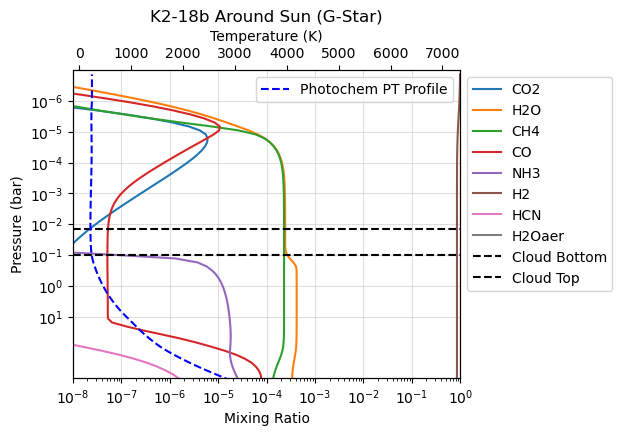

In [11]:
plot_photochem_model_with_cloud(minNep_inputs=[minNep_inputs_archean_HZflux])

## This is where we impose a new cloud on a system that may not have recognized one
- You will need this file to run the Final Presentation Case notebook
- This is the main takeaway from this notebook b/c you can change the pbot or cloud fraction here

In [12]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import picaso.justplotit as jpi
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline

from astropy import constants
from photochem.utils import zahnle_rx_and_thermo_files
from photochem.extensions import gasgiants # Import the gasgiant extensions

import json
from astroquery.mast import Observations
from photochem.utils import stars

import pickle
import requests

from mpi4py import MPI

from threadpoolctl import threadpool_limits
_ = threadpool_limits(limits=1)

from bs4 import BeautifulSoup
import os
from urllib.parse import urljoin, urlparse
import tarfile
import gridutils
import star_spectrum
import Photochem_grid
import h5py
import numpy as np
import pandas as pd
import copy

# This function is specific to archean and modern Earth; this will change with alterations to the keys of the earth_diff_phases file.
from itertools import cycle

opacity_path=f'/Users/epawelka/Documents/NASA_Ames_ProjS25/AmesProjS25Work/picaso_v4/reference/opacities/opacities_0.3_15_R15000.db'
OPACITY = jdi.opannection(filename_db=opacity_path, wave_range=[0.3,2.5])

# This calculates the spectrum (for now, without clouds)
def reflected_spectrum_K218b_Sun(total_flux=None, planet_metal=None, tint=None, Kzz=None, phase_angle=None, Photochem_file='results/Photochem_1D_fv.h5', atmosphere_kwargs={}, pbot=1e-1, cloud_percent=.5):

    """
    This finds the reflected spectra of a planet similar to K218b around a Sun.

    Parameters:
    total_flux: float
        This is the total flux of stellar radiation on your planet in units of x Solar flux.
    log10_planet_metallicity: float
        This is the planet's metallicity in units of x Solar metallicity.
    tint: float
        This is the planet's internal temperature in Kelvin.
    Kzz: float
        This is the eddy diffusion coefficient in logspace (i.e. the power of 10) in cm/s^2.
    phase_angle: float
        This is the phase of orbit the planet is in relative to its star and the observer (i.e. how illuminated it is), units of radians.
    Photochem_file: string
        This is the path to the Photochem grid you would like to pull composition information from.
    atmosphere_kwargs: dict 'exclude_mol': value where value is a string
        If left empty, all molecules are included, but can limit how many molecules are calculated. 

    Results: IDK for sure though
    wno: grid of 150 points
        ???
    fpfs: grid of 150 points
        This is the relative flux of the planet and star (fp/fs). 
    alb: grid of 150 points
        ???
    np.array(clouds): grid of 150 points
        This is a grid of whether or not a cloud was used to make the reflective spectra using the binary equivalent to booleans (True=1, False=0).
        
    """

    opacity = OPACITY

    planet_metal = float(planet_metal)
    
    start_case = jdi.inputs()

    # Then calculate the composition from the TP profile
    class K218b:
        
        planet_radius = (2.61*6.371e+6*u.m) # in meters
        planet_mass = (8.63*5.972e+24*u.kg) # in kg
        planet_Teq = stars.equilibrium_temperature(total_flux*1361, 0) # Equilibrium temp (K)
        planet_grav = (const.G * (planet_mass)) / ((planet_radius)**2) # of K2-18b in m/s^2
        planet_ctoO = 1.0 # 1x solar

    class Sun:
        
        stellar_radius = 1 # Solar radii
        stellar_Teff = 5778 # K
        stellar_metal = 0.0 # log10(metallicity)
        stellar_logg = 4.4 # log10(gravity), in cgs units

    semi_major = Reflected_Spectra.calc_semi_major_SUN(Teq=K218b.planet_Teq) # in AU
    solar_zenith_angle = 60 # Used in Tsai et al. (2023)
        
    # Star and Planet Parameters (Stay the Same & Should Match Photochem & PICASO)
    start_case.phase_angle(phase_angle, num_tangle=8, num_gangle=8) #radians, using default here

    jupiter_mass = const.M_jup.value # in kg
    jupiter_radius = 69911e+3 # in m
    start_case.gravity(gravity=K218b.planet_grav, gravity_unit=jdi.u.Unit('m/(s**2)'), radius=(K218b.planet_radius.value)/jupiter_radius, radius_unit=jdi.u.Unit('R_jup'), mass=(K218b.planet_mass.value)/jupiter_mass, mass_unit=jdi.u.Unit('M_jup'))
    
    # star temperature, metallicity, gravity, and opacity (default opacity is opacity.db in the reference folder)
    start_case.star(opannection=opacity, temp=Sun.stellar_Teff, logg=Sun.stellar_logg, semi_major=semi_major, metal=Sun.stellar_metal, radius=Sun.stellar_radius, radius_unit=jdi.u.R_sun, semi_major_unit=jdi.u.au)

    # Match Photochemical Files
    results = FilterGrids.find_Photochem_sol(filepath=Photochem_file, total_flux=total_flux, log10_planet_metallicity=planet_metal, tint=tint, Kzz=Kzz, grid_gridvals=Photochem_grid.get_gridvals_Photochem())

    sol_dict_old = {}
    soleq_dict_old = {}
    PT_list_old = []
    for key in results.keys():
        if key.endswith('_sol'):
            sol_dict_old[key] = results[key]
        if key.endswith('_soleq'):
            soleq_dict_old[key] = results[key]
        if key == 'pressure_sol':
            PT_list_old.append(results[key])
        if key == 'temperature_sol':
            PT_list_old.append(results[key])

    sol_dict = {key.removesuffix('_sol') if key.endswith('_sol') else key: value 
    for key, value in sol_dict_old.items()}

    soleq_dict = {key.removesuffix('_soleq') if key.endswith('_soleq') else key: value 
    for key, value in soleq_dict_old.items()}
    
    # Determine Planet Atmosphere & Composition

    atm, sol_dict_aer = Reflected_Spectra.make_picaso_atm(sol_dict) # Converted Pressure of Photochem, in dynes/cm^2, back to bars and flip all arrays before placing into PICASO
    df_atmo = jdi.pd.DataFrame(atm)

    if 'exclude_mol' in atmosphere_kwargs:
        sp = atmosphere_kwargs['exclude_mol'][0]
        if sp in df_atmo:
            df_atmo[sp] *= 0
            
    start_case.atmosphere(df = df_atmo) 
    df_cldfree = start_case.spectrum(opacity, calculation='reflected', full_output=True)
    wno_cldfree, alb_cldfree, fpfs_cldfree = df_cldfree['wavenumber'], df_cldfree['albedo'], df_cldfree['fpfs_reflected']
    _, alb_cldfree_grid = jdi.mean_regrid(wno_cldfree, alb_cldfree, R=150)
    wno_cldfree_grid, fpfs_cldfree_grid = jdi.mean_regrid(wno_cldfree, fpfs_cldfree, R=150)

    print(f'This is the length of the grids created: {len(wno_cldfree_grid)}, {len(fpfs_cldfree_grid)}')

    # Determine Whether to Add Clouds or Not?

    if "H2Oaer" in sol_dict_aer:
        # What if we added Grey Earth-like Clouds?
        
        # Calculate pbot:
        pbot = pbot

        if pbot is not None:
            print(f'pbot was calculated, there is H2Oaer and a cloud was implemented')
            logpbot = np.log10(pbot)
        
            # Calculate logdp:
            ptop_earth = 0.6
            pbot_earth = 0.7
            logdp = np.log10(pbot_earth) - np.log10(ptop_earth)  
    
            # Default opd (optical depth), w0 (single scattering albedo), g0 (asymmetry parameter)
            start_case.clouds(w0=[0.99], g0=[0.85], 
                              p = [logpbot], dp = [logdp], opd=[10])
            # Cloud spectrum
            df_cld = start_case.spectrum(opacity,full_output=True)
            
            # Average the two spectra - This differs between Calculating Earth Reflected Spectra 
            wno_c, alb_c, fpfs_c, albedo_c = df_cld['wavenumber'],df_cld['albedo'],df_cld['fpfs_reflected'], df_cld['albedo']
            _, alb = jdi.mean_regrid(wno_cldfree, cloud_percent*alb_cldfree+cloud_percent*albedo_c,R=150)
            wno, fpfs = jdi.mean_regrid(wno_cldfree, cloud_percent*fpfs_cldfree+cloud_percent*fpfs_c,R=150)

            # Match the length of the clouds array with the length of wno or alb (fpfs is different length)
            clouds = [1] * len(wno)

            return wno, fpfs, alb, np.array(clouds)

        else:
            print(f'pbot is empty, so no cloud is implemented')
            wno = wno_cldfree_grid.copy()
            alb = alb_cldfree_grid.copy()
            fpfs = fpfs_cldfree_grid.copy()

            # Match the length of the clouds array with the length of wno or alb (fpfs is different length)
            clouds = [0] * len(wno)

            print(f'This is the length of the values I want to save: wno {len(wno)}, alb {len(alb)}, fpfs {len(fpfs)}, clouds {len(clouds)}')

            return wno, fpfs, alb, np.array(clouds)

    else:
        print(f'H2Oaer is not in solutions')
        wno = wno_cldfree_grid.copy()
        alb = alb_cldfree_grid.copy()
        fpfs = fpfs_cldfree_grid.copy()
        print(f'For the inputs: {total_flux}, {planet_metal}, {tint}, {Kzz}, {phase_angle}, The length should match: wno - {len(wno)}, alb - {len(alb)}, fpfs - {len(fpfs)}')
        
        # Match the length of the clouds array with the length of wno or alb (fpfs is different length)
        clouds = [0] * len(wno) # This means that there are no clouds

        return wno, fpfs, alb, np.array(clouds)


In [13]:
def find_ReflectedSpectra_sol(filepath='/Users/epawelka/Documents/NASA_Ames_ProjS25/AmesProjS25Work/results/ReflectedSpectra_fv.h5',total_flux = None, log10_planet_metallicity=None, tint=None, Kzz=None, phase=None, grid_gridvals=Reflected_Spectra.get_gridvals_RSM()):

    """
    Inputs:
    log10_totalflux = np.array([1.25])
    log10_planet_metallicity = np.array([0.75])
    tint = np.array([50]) # in Kelvin
    kzz = np.array([7]) # in log space
    phase = np.array([0]) # in radians
    """

    # This takes the inputs that define the grid
    gridshape = tuple(len(a) for a in grid_gridvals)

    print(f"Make sure your inputs are within the following ranges, total_flux: {np.min(grid_gridvals[0])} - {np.max(grid_gridvals[0])} xsolar, planet metallicity: {np.min((grid_gridvals[1]).astype(float))} - {np.max((grid_gridvals[1]).astype(float))} xsolar, tint: {np.min(grid_gridvals[2])} - {np.max(grid_gridvals[2])} K, kzz: {np.min(grid_gridvals[3])} - {np.max(grid_gridvals[3])} log10 of cm^2/s, phase: {np.min(grid_gridvals[4])} - {np.max(grid_gridvals[4])} radians.")

    # Check to see if there is a solution that already exists
    wno, albedo, fpfs = GraphsKey.find_Reflected_Spectra_values(filename=filepath, total_flux=total_flux, log10_planet_metallicity=log10_planet_metallicity, tint=tint, Kzz=Kzz, phase=phase)
    
    if wno is not None:
        print(f'All inputs chosen were directly on the grid!')
        comb_results = {}
        comb_results['wno'] = wno
        comb_results['albedo'] = albedo
        comb_results['fpfs'] = fpfs
        return comb_results

    else:

        print(f'Interpolating results...')
        
        # This notes the grid and associated inputs used to make it as the data
        PhotCh_grid = gridutils.GridInterpolator(filename=filepath, gridvals=grid_gridvals)

        # This interpolates the results based on the user input
        interp_results = {}
    
        # New grid values to interpolate
        user_gridvals = (total_flux, log10_planet_metallicity, tint, Kzz, phase)
    
        for key in PhotCh_grid.data.keys():
            if key.startswith('cloud'):
                continue
            else:
                interp_function = PhotCh_grid.make_interpolator(key=key, logspace=False)
                interp_results[key] = interp_function(user_gridvals)
                
        return interp_results

## Ranging over many pbot and cloud percents(but really fraction) values for new imposed cloud

[ 0.01  1.12  2.23  3.34  4.45  5.56  6.67  7.78  8.89 10.  ] [0.5        0.54444444 0.58888889 0.63333333 0.67777778 0.72222222
 0.76666667 0.81111111 0.85555556 0.9       ]
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)
This is the length of the grids created: 319, 319
pbot was calculated, there is H2Oaer and a cloud was implemented


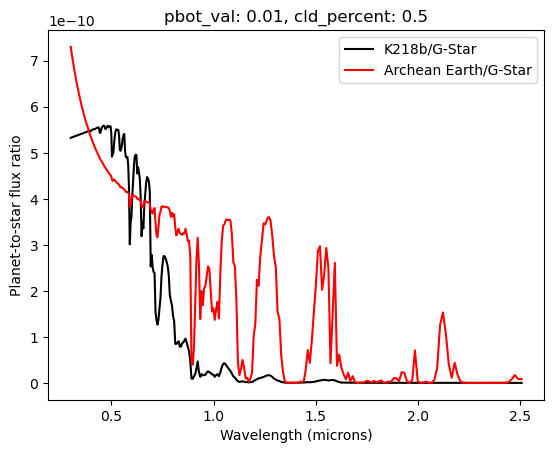

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)
This is the length of the grids created: 319, 319
pbot was calculated, there is H2Oaer and a cloud was implemented


In [ ]:
input_list =  [0.915, 0.5, 155.0, 5.0, 2.175]
flux = input_list[0]
metal = input_list[1]
tint = input_list[2]
kzz = input_list[3]
phase = input_list[4]

pbot = np.linspace(0.01, 10, 10)
cloud_percent = np.linspace(0.5, 0.9, 10)
print(pbot, cloud_percent)

for pbot_val in pbot:
    for cld_percent in cloud_percent:
        wno, fpfs, alb, clds = reflected_spectrum_K218b_Sun(total_flux=flux, planet_metal=metal, tint=tint, Kzz=kzz, phase_angle=phase, Photochem_file='results/Photochem_1D_fv.h5', atmosphere_kwargs={}, pbot=pbot_val, cloud_percent=cld_percent)
        plt.plot(1e4/wno, fpfs, c='k', lw=1.5, label='K218b/G-Star')
        plt.plot(1e4/wv_archean, fpfs_archean, c='red', lw=1.5, label='Archean Earth/G-Star')
        plt.ylabel('Planet-to-star flux ratio')
        plt.xlabel('Wavelength (microns)')
        plt.title(f'pbot_val: {pbot_val}, cld_percent: {cld_percent}')
        plt.legend()
        plt.show()

In [ ]:
plt.plot(1e4/wno, fpfs, c='k', lw=1.5, label='K218b/G-Star')
plt.plot(1e4/wv_archean, fpfs_archean, c='red', lw=1.5, label='Archean Earth/G-Star')
plt.ylabel('Planet-to-star flux ratio')
plt.xlabel('Wavelength (microns)')
plt.title('Reflected Spectra w/ Earth Clouds')
plt.legend()
plt.show()

In [ ]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_earth = phase_angle_list[:-1]

input_list =  [0.915, 0.5, 155.0, 5.0, 2.175]
flux = input_list[0]
metal = input_list[1]
tint = input_list[2]
kzz = input_list[3]
phase = input_list[4]

pbot = np.linspace(0.01, 10, 3)
cloud_percent = np.linspace(0.01, 0.1, 3)
#pbot = [0.1, 0.2]
#cloud_percent = [0.5]
print(pbot, cloud_percent)

wno_list = []
fpfs_list = []
alb_list = []
clds_list = []
pbot_cld_list = []

for pbot_val in pbot:
    for cld_percent in cloud_percent:
        wno, fpfs, alb, clds = reflected_spectrum_K218b_Sun(total_flux=flux, planet_metal=metal, tint=tint, Kzz=kzz, phase_angle=phase, Photochem_file='results/Photochem_1D_fv.h5', atmosphere_kwargs={}, pbot=pbot_val, cloud_percent=cld_percent)
        wno_list.append(wno)
        fpfs_list.append(fpfs)
        alb_list.append(alb)
        clds_list.append(clds)
        pbot_cld_list.append([pbot_val, cld_percent])
        print(pbot_cld_list)
        
wv_archean_list = []    
fpfs_archean_list = []
wv_modern_list = []
fpfs_modern_list = []
    
with open('earth_diff_phases.pkl', 'rb') as file:
    earth_dict = pickle.load(file)
    for phase in phase_earth:
        for key in list(earth_dict.keys()):
            if key.endswith(f'_{phase}'):
                if key.startswith(f'Archean_wv_'):
                    wv_archean = earth_dict[key]
                    wv_archean_list.append(wv_archean)
                if key.startswith(f'Archean_fpfs_'):
                    fpfs_archean = earth_dict[key]
                    fpfs_archean_list.append(fpfs_archean)
                if key.startswith(f'Modern_wv_'):
                    wv_modern = earth_dict[key]
                    wv_modern_list.append(wv_modern)
                if key.startswith(f'Modern_fpfs_'):
                    fpfs_modern = earth_dict[key]
                    fpfs_modern_list.append(fpfs_modern)

In [ ]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_earth = phase_angle_list[:-1]

wv_archean_list = []    
fpfs_archean_list = []
wv_modern_list = []
fpfs_modern_list = []

with open('earth_diff_phases.pkl', 'rb') as file:
    earth_dict = pickle.load(file)
    for phase in phase_earth:
        for key in list(earth_dict.keys()):
            if key.endswith(f'_{phase}'):
                if key.startswith(f'Archean_wv_'):
                    wv_archean = earth_dict[key]
                    wv_archean_list.append(wv_archean)
                if key.startswith(f'Archean_fpfs_'):
                    fpfs_archean = earth_dict[key]
                    fpfs_archean_list.append(fpfs_archean)
                if key.startswith(f'Modern_wv_'):
                    wv_modern = earth_dict[key]
                    wv_modern_list.append(wv_modern)
                if key.startswith(f'Modern_fpfs_'):
                    fpfs_modern = earth_dict[key]
                    fpfs_modern_list.append(fpfs_modern)


index_earth = np.linspace(0, len(phase_earth) - 1, len(phase_earth), dtype='int')
print(index_earth)

index_minNep = np.linspace(0, len(pbot_cld_list) - 1, len(pbot_cld_list), dtype='int')
        
# Define a list of colors or use a color cycle
colors = ['green', 'blue', 'purple', 'orange']
color_cycler = cycle(colors) # For cycling through colors if more data sets than colors

wv_earth = wv_archean_list
fpfs_earth = fpfs_archean_list

for index in index_minNep:
    wno = wno_list[index]
    fpfs = fpfs_list[index]
    pbot_val = pbot_cld_list[index][0]
    cld_percent = pbot_cld_list[index][1]
    fig, ax = plt.subplots()
    ax.plot(1e4/wno, fpfs, c='k', lw=1.5, label='K218b/G-Star')
    ax.set_ylabel('Planet-to-star flux ratio')
    ax.set_xlabel('Wavelength (microns)')
    ax.set_title(f'pbot_val: {pbot_val}, cld_percent: {cld_percent}')

    for index_earth_val in index_earth:
                        
        ax.plot(1e4/wv_archean_list[index_earth_val], fpfs_archean_list[index_earth_val], c=next(color_cycler), lw=1.5, alpha=0.5, label=f'Archean Earth {phase_earth[index_earth_val]}')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
                

In [ ]:
messing_with_cld = {'input':[0.915, 0.5, 155.0, 5.0, 2.175],'pbot_cld':pbot_cld_list,'clds':clds_list,'alb':alb_list, 'fpfs':fpfs_list,'wno':wno_list}
print(messing_with_cld)

## Save these results if the file doesn't already exist

In [ ]:
#with open("minNep_diffcld_params_smaller_vals.pkl", "wb") as file:
#    pickle.dump(messing_with_cld, file)
#    file.close()

In [ ]:
with open("minNep_diffcld_params_smaller_vals.pkl", "rb") as file:
    loaded_dictionary = pickle.load(file)
    print(loaded_dictionary)